[[85  3  1]
 [70  4  1]
 [70  3  1]
 [55  3  1]
 [40  0  1]
 [41  4  1]
 [41  0  1]
 [42  2  1]]


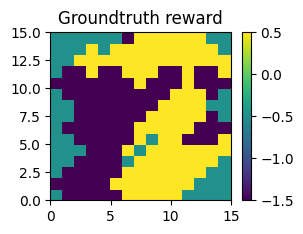

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics as stats
import os

import irl.deep_maxent_list as deep_maxent
import irl.mdp.objectworld as objectworld
from irl.value_iteration import find_policy

ow = objectworld.Objectworld(15, 25, 2, 0.3, 0.90)
ground_r = np.array([ow.reward(s) - 0.5 for s in range(ow.n_states)])

plt.subplot(2, 2, 1)
plt.pcolor(ground_r.reshape((15, 15)))
plt.colorbar()

plt.title("Groundtruth reward")
plt.savefig('fig/Groundtruth reward',dpi=300)

policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
tra = ow.generate_trajectories(40,8,lambda s: policy[s])
print(tra[0])

# grid_size= 25, 
#          discount= 0.93, 
#          n_objects= 30, 
#          n_colours= 2, 
#          n_trajectories= 40, 
#          epochs= 120, 
#          learning_rate= 0.01, 
#          structure= (4, 4))

In [2]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Your existing code...

# # Plotting the groundtruth reward
# plt.figure(figsize=(8, 8))

# # plt.subplot(2, 2, 1)
# # plt.pcolor(ground_r.reshape((15, 15)))
# # plt.colorbar()
# # plt.title("Groundtruth reward")

# # Given trajectory data
# trajectory_data = tra[13]

# # Plotting the trajectory
# x_values = [0.5 + (state[0] % 15) for state in trajectory_data]  # Shifting x-coordinates to block centers
# print(x_values)
# y_values = [0.5 + (state[0] // 15) for state in trajectory_data]  # Shifting y-coordinates to block centers
# print(y_values)
# plt.subplot(2, 2, 1)
# plt.pcolor(ground_r.reshape((15, 15)))  # Assuming ground_r is the same for trajectory visualization
# # plt.plot(x_values, y_values, marker='o', linestyle='-', color='r')
# plt.title("Object's Trajectory")

# # Adding directional arrows based on movement direction
# for i in range(len(trajectory_data)):
#     x = x_values[i]
#     y = y_values[i]
#     direction = trajectory_data[i][1]
#     print(direction)

#     if direction == 1:  # Move Up
#         dx, dy = 0, 1
#     elif direction == 0:  # Move Right
#         dx, dy = 1, 0
#     elif direction == 3:  # Move Down
#         dx, dy = 0, -1
#     elif direction == 2:  # Move Left
#         dx, dy = -1, 0
#     else:
#         dx, dy = 0,0

#     plt.arrow(x, y, dx * 0.4, dy * 0.4, head_width=0.2, head_length=0.2, fc='red', ec='red')

# plt.tight_layout()
# plt.savefig('fig/Trajectory_with_arrows', dpi=300)
# plt.show()


In [3]:
"""
Run maximum entropy inverse reinforcement learning on the objectworld MDP.

Matthew Alger, 2015
matthew.alger@anu.edu.au
"""

# import numpy as np
# import matplotlib.pyplot as plt
# import time

# import irl.deep_maxent_list as deep_maxent
# import irl.mdp.objectworld as objectworld
# from irl.value_iteration import find_policy

avr_arr =[]
arr1 =[]
arr2 =[]
arr3 =[]
arr4 =[]
arr5 =[]
arr6 =[]
arr7 =[]
arr8 =[]
arr9 =[]
arr10 =[]
arr_mean =[]
arr_median =[]
arr_sum_0 =[]
# arr_norm_avr =[]
folder = 0


def main10(grid_size, discount, n_objects, n_colours, n_trajectories, epochs,
         learning_rate, structure):
    """
    Run deep maximum entropy inverse reinforcement learning on the objectworld
    MDP.

    Plots the reward function.

    grid_size: Grid size. int.
    discount: MDP discount factor. float.
    n_objects: Number of objects. int.
    n_colours: Number of colours. int.
    n_trajectories: Number of sampled trajectories. int.
    epochs: Gradient descent iterations. int.
    learning_rate: Gradient descent learning rate. float.
    structure: Neural network structure. Tuple of hidden layer dimensions, e.g.,
        () is no neural network (linear maximum entropy) and (3, 4) is two
        hidden layers with dimensions 3 and 4.
    """
    num = 1
    while True:
        folder_exist = os.path.exists(f'fig/single{num}')
        if not folder_exist:
            os.makedirs(f'fig/single{num}')
            os.makedirs(f'fig/each{num}')
            break
        num += 1
    folder = num
    os.makedirs(f'fig/process{folder}')
    
    wind = 0.3
    trajectory_length = 8
    l1 = l2 = 0

#     ow = objectworld.Objectworld(grid_size, n_objects, n_colours, wind,
#                                  discount)
#     ground_r = np.array([ow.reward(s) for s in range(ow.n_states)])
    policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
    trajectories = ow.generate_trajectories(n_trajectories,
                                            trajectory_length,
                                            lambda s: policy[s])

    feature_matrix = ow.feature_matrix(discrete=False)
    
    # doing the 10 independent deep maxent irl
#     start_time = time.time()
    ro1 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro2 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro3 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro4 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro5 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro6 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro7 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro8 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro9 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro10 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    t = 0
    time_of_10 = 0
    
    # process in each epochs
    for i in range(epochs):
        print(i)
        r1 = ro1[i]
        r2 = ro2[i]
        r3 = ro3[i]
        r4 = ro4[i]
        r5 = ro5[i]
        r6 = ro6[i]
        r7 = ro5[i]
        r8 = ro6[i]
        r9 = ro5[i]
        r10 = ro6[i]
        r = (r1+r2+r3+r4+r5+r6+r7+r8+r9+r10)/10
    #     r = r1
    
#         # normalization
#         min_val = np.min(r)
#         max_val = np.max(r)
#         r = ((2 * (r - min_val)) / (max_val - min_val)) - 1 

#         min_val = np.min(r1)
#         max_val = np.max(r1)
#         r1 = ((2 * (r1 - min_val)) / (max_val - min_val)) - 1 

#         min_val = np.min(r2)
#         max_val = np.max(r2)
#         r2 = ((2 * (r2 - min_val)) / (max_val - min_val)) - 1 

#         min_val = np.min(r3)
#         max_val = np.max(r3)
#         r3 = ((2 * (r3 - min_val)) / (max_val - min_val)) - 1 

#         min_val = np.min(r4)
#         max_val = np.max(r4)
#         r4 = ((2 * (r4 - min_val)) / (max_val - min_val)) - 1 
        
#         min_val = np.min(r5)
#         max_val = np.max(r5)
#         r5 = ((2 * (r5 - min_val)) / (max_val - min_val)) - 1 
        
#         min_val = np.min(r6)
#         max_val = np.max(r6)
#         r6 = ((2 * (r6 - min_val)) / (max_val - min_val)) - 1 
        
#         min_val = np.min(r7)
#         max_val = np.max(r7)
#         r7 = ((2 * (r7 - min_val)) / (max_val - min_val)) - 1 
        
#         min_val = np.min(r8)
#         max_val = np.max(r8)
#         r8 = ((2 * (r8 - min_val)) / (max_val - min_val)) - 1 
        
#         min_val = np.min(r9)
#         max_val = np.max(r9)
#         r9 = ((2 * (r9 - min_val)) / (max_val - min_val)) - 1 
        
#         min_val = np.min(r10)
#         max_val = np.max(r10)
#         r10 = ((2 * (r10 - min_val)) / (max_val - min_val)) - 1 
        
        plt.tight_layout()

        ### plot reward each 10 epochs
        if t == 10:
            plt.subplot(2, 2, 1)
            plt.pcolor(ground_r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Groundtruth reward")
            #single
            plt.subplot(2, 2, 2)
            plt.pcolor(r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Recovered_average reward")
            plt.savefig(f'fig/process{folder}/{time_of_10}',dpi=300)
            plt.show()
            t = 0
            time_of_10+=1
        else:
            t += 1
            
        if i == epochs-1:
            plt.subplot(2, 2, 1)
            plt.pcolor(ground_r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Groundtruth reward")
            #single

            plt.subplot(2, 2, 2)
            plt.pcolor(r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Recovered_average reward")
            plt.savefig(f'fig/single{folder}/1',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r1.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("1 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r2.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("2 reward")
            plt.savefig(f'fig/each{folder}/1',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r3.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("3 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r4.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("4 reward")
            plt.savefig(f'fig/each{folder}/2',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r5.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("5 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r6.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("6 reward")
            plt.savefig(f'fig/each{folder}/3',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r7.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("7 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r8.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("8 reward")
            plt.savefig(f'fig/each{folder}/4',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r9.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("9 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r10.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("10 reward")
            plt.savefig(f'fig/each{folder}/5',dpi=300)
            plt.show()

        r_norm_avr=(r1+r2+r3+r4+r5+r6+r7+r8+r9+r10)/10
    
        # Initialize loss computer
        sum_un_avr = 0
        sum_avr = 0
        sum_norm_avr = 0
        sum_ = 0
        sum_1 =0
        sum_2=0
        sum_3=0
        sum_4=0
        sum_5=0
        sum_6=0
        sum_7=0
        sum_8=0
        sum_9=0
        sum_10=0
        sum_normal=0

        # Compute loss
        for x in range(len(ground_r)):
            i = ground_r[x]
            
            #avr's loss
            sum_avr += (r[x]-i)**2
            
            #each independent's loss
            sum_1 += (r1[x]-i)**2
            
            sum_2 += (r2[x]-i)**2
           
            sum_3 += (r3[x]-i)**2
            
            sum_4 += (r4[x]-i)**2
            
            sum_5 += (r5[x]-i)**2
            
            sum_6 += (r6[x]-i)**2
            
            sum_7 += (r7[x]-i)**2
            
            sum_8 += (r8[x]-i)**2
            
            sum_9 += (r9[x]-i)**2
            
            sum_10 += (r10[x]-i)**2

            sum_normal += i**2
            
        avr_arr.append(sum_avr)
        
        arr_sum_0.append(sum_normal)
        
        arr1.append(sum_1)
        arr2.append(sum_2)
        arr3.append(sum_3)
        arr4.append(sum_4)
        arr5.append(sum_5)
        arr6.append(sum_6)
        arr7.append(sum_7)
        arr8.append(sum_8)
        arr9.append(sum_9)
        arr10.append(sum_10)
        datas = [sum_1,sum_2,sum_3,sum_4,sum_5,sum_6,sum_7,sum_8,sum_9,sum_10]
        arr_mean.append(stats.mean(datas))
        arr_median.append(stats.median(datas))
        
        #print each losses including mean, median and avr 
        print(f'avr: {sum_avr}')
        print(f'norm_avr: {sum_norm_avr}')
        print('each:')
        print(sum_1)
        print(sum_2)
        print(sum_3)
        print(sum_4)
        print(sum_5)
        print(sum_6)
        print(sum_7)
        print(sum_8)
        print(sum_9)
        print(sum_10)
        print(stats.mean(datas))
        print(stats.median(datas))
        print(sum_normal)

        print('---------------------')
        
        #last epoch output the result compare to mean and median
        if i == epochs-1:
            print(sum_avr/stats.mean(datas))
            print(sum_avr/stats.median(datas))

In [24]:
"""
Run maximum entropy inverse reinforcement learning on the objectworld MDP.

Matthew Alger, 2015
matthew.alger@anu.edu.au
"""

# import numpy as np
# import matplotlib.pyplot as plt
# import time

# import irl.deep_maxent_list as deep_maxent
# import irl.mdp.objectworld as objectworld
# from irl.value_iteration import find_policy

avr_arrn =[]
arr1n =[]
arr2n =[]
arr3n =[]
arr4n =[]
arr5n =[]
arr6n =[]
arr7n =[]
arr8n =[]
arr9n =[]
arr10n =[]
arr_meann =[]
arr_mediann =[]
arr_sum_0n =[]
# arr_norm_avr =[]
folder = 0


def main10n(grid_size, discount, n_objects, n_colours, n_trajectories, epochs,
         learning_rate, structure):
    """
    Run deep maximum entropy inverse reinforcement learning on the objectworld
    MDP.

    Plots the reward function.

    grid_size: Grid size. int.
    discount: MDP discount factor. float.
    n_objects: Number of objects. int.
    n_colours: Number of colours. int.
    n_trajectories: Number of sampled trajectories. int.
    epochs: Gradient descent iterations. int.
    learning_rate: Gradient descent learning rate. float.
    structure: Neural network structure. Tuple of hidden layer dimensions, e.g.,
        () is no neural network (linear maximum entropy) and (3, 4) is two
        hidden layers with dimensions 3 and 4.
    """
    num = 1
    while True:
        folder_exist = os.path.exists(f'fig/single{num}')
        if not folder_exist:
            os.makedirs(f'fig/single{num}')
            os.makedirs(f'fig/each{num}')
            break
        num += 1
    folder = num
    os.makedirs(f'fig/process{folder}')
    
    wind = 0.3
    trajectory_length = 8
    l1 = l2 = 0

#     ow = objectworld.Objectworld(grid_size, n_objects, n_colours, wind,
#                                  discount)
#     ground_r = np.array([ow.reward(s) for s in range(ow.n_states)])
    policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
    trajectories = ow.generate_trajectories(n_trajectories,
                                            trajectory_length,
                                            lambda s: policy[s])

    feature_matrix = ow.feature_matrix(discrete=False)
    
    # doing the 10 independent deep maxent irl
#     start_time = time.time()
    ro1 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro2 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro3 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro4 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro5 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro6 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro7 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro8 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro9 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    ro10 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories, epochs,
        learning_rate, l1=l1, l2=l2)
    t = 0
    time_of_10 = 0
    
    # process in each epochs
    for i in range(epochs):
        print(i)
        r1 = ro1[i]
        r2 = ro2[i]
        r3 = ro3[i]
        r4 = ro4[i]
        r5 = ro5[i]
        r6 = ro6[i]
        r7 = ro5[i]
        r8 = ro6[i]
        r9 = ro5[i]
        r10 = ro6[i]
        r = (r1+r2+r3+r4+r5+r6+r7+r8+r9+r10)/10
    #     r = r1
    
        # normalization
        min_val = np.min(r)
        max_val = np.max(r)
        r = ((2 * (r - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r1)
        max_val = np.max(r1)
        r1 = ((2 * (r1 - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r2)
        max_val = np.max(r2)
        r2 = ((2 * (r2 - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r3)
        max_val = np.max(r3)
        r3 = ((2 * (r3 - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r4)
        max_val = np.max(r4)
        r4 = ((2 * (r4 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r5)
        max_val = np.max(r5)
        r5 = ((2 * (r5 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r6)
        max_val = np.max(r6)
        r6 = ((2 * (r6 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r7)
        max_val = np.max(r7)
        r7 = ((2 * (r7 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r8)
        max_val = np.max(r8)
        r8 = ((2 * (r8 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r9)
        max_val = np.max(r9)
        r9 = ((2 * (r9 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r10)
        max_val = np.max(r10)
        r10 = ((2 * (r10 - min_val)) / (max_val - min_val)) - 1 
        
        plt.tight_layout()

        ### plot reward each 10 epochs
        if t == 10:
            plt.subplot(2, 2, 1)
            plt.pcolor(ground_r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Groundtruth reward")
            #single
            plt.subplot(2, 2, 2)
            plt.pcolor(r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Recovered_average reward")
            plt.savefig(f'fig/process{folder}/{time_of_10}',dpi=300)
            plt.show()
            t = 0
            time_of_10+=1
        else:
            t += 1
            
        if i == epochs-1:
            plt.subplot(2, 2, 1)
            plt.pcolor(ground_r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Groundtruth reward")
            #single

            plt.subplot(2, 2, 2)
            plt.pcolor(r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Recovered_average reward")
            plt.savefig(f'fig/single{folder}/1',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r1.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("1 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r2.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("2 reward")
            plt.savefig(f'fig/each{folder}/1',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r3.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("3 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r4.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("4 reward")
            plt.savefig(f'fig/each{folder}/2',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r5.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("5 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r6.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("6 reward")
            plt.savefig(f'fig/each{folder}/3',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r7.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("7 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r8.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("8 reward")
            plt.savefig(f'fig/each{folder}/4',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r9.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("9 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r10.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("10 reward")
            plt.savefig(f'fig/each{folder}/5',dpi=300)
            plt.show()

        r_norm_avr=(r1+r2+r3+r4+r5+r6+r7+r8+r9+r10)/10
    
        # Initialize loss computer
        sum_un_avr = 0
        sum_avr = 0
        sum_norm_avr = 0
        sum_ = 0
        sum_1 =0
        sum_2=0
        sum_3=0
        sum_4=0
        sum_5=0
        sum_6=0
        sum_7=0
        sum_8=0
        sum_9=0
        sum_10=0
        sum_normal=0

        # Compute loss
        for x in range(len(ground_r)):
            i = ground_r[x]
            
            #avr's loss
            sum_avr += (r[x]-i)**2
            
            #each independent's loss
            sum_1 += (r1[x]-i)**2
            
            sum_2 += (r2[x]-i)**2
           
            sum_3 += (r3[x]-i)**2
            
            sum_4 += (r4[x]-i)**2
            
            sum_5 += (r5[x]-i)**2
            
            sum_6 += (r6[x]-i)**2
            
            sum_7 += (r7[x]-i)**2
            
            sum_8 += (r8[x]-i)**2
            
            sum_9 += (r9[x]-i)**2
            
            sum_10 += (r10[x]-i)**2

            sum_normal += i**2
            
        avr_arrn.append(sum_avr)
        
        arr_sum_0n.append(sum_normal)
        
        arr1n.append(sum_1)
        arr2n.append(sum_2)
        arr3n.append(sum_3)
        arr4n.append(sum_4)
        arr5n.append(sum_5)
        arr6n.append(sum_6)
        arr7n.append(sum_7)
        arr8n.append(sum_8)
        arr9n.append(sum_9)
        arr10n.append(sum_10)
        datas = [sum_1,sum_2,sum_3,sum_4,sum_5,sum_6,sum_7,sum_8,sum_9,sum_10]
        arr_meann.append(stats.mean(datas))
        arr_mediann.append(stats.median(datas))
        
        #print each losses including mean, median and avr 
        print(f'avr: {sum_avr}')
        print(f'norm_avr: {sum_norm_avr}')
        print('each:')
        print(sum_1)
        print(sum_2)
        print(sum_3)
        print(sum_4)
        print(sum_5)
        print(sum_6)
        print(sum_7)
        print(sum_8)
        print(sum_9)
        print(sum_10)
        print(stats.mean(datas))
        print(stats.median(datas))
        print(sum_normal)

        print('---------------------')
        
        #last epoch output the result compare to mean and median
        if i == epochs-1:
            print(sum_avr/stats.mean(datas))
            print(sum_avr/stats.median(datas))

0
avr: 164.53960130579378
norm_avr: 0
each:
180.27784878624396
388.4350080653682
135.5040383423659
162.0920442924201
238.92193371443068
355.41809436504394
238.92193371443068
355.41809436504394
238.92193371443068
355.41809436504394
264.9329023724822
238.92193371443068
226.25
---------------------
1
avr: 160.87970432736398
norm_avr: 0
each:
183.5509239087534
378.9353540868376
135.80503646232634
160.35693932497182
231.41396815552991
350.7531261512603
231.41396815552991
350.7531261512603
231.41396815552991
350.7531261512603
260.51495367032595
231.41396815552991
226.25
---------------------
2
avr: 157.7159899271703
norm_avr: 0
each:
187.72166956155027
370.03822773403215
136.18234200428512
157.90161161574932
224.26438059708642
346.3863414817152
224.26438059708642
346.3863414817152
224.26438059708642
346.3863414817152
256.37960171520217
224.26438059708642
226.25
---------------------
3
avr: 154.83572976095564
norm_avr: 0
each:
192.2459404957729
361.07670232406673
136.64053287712161
153.212180

/tmp/ipykernel_93439/3177489991.py:175: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


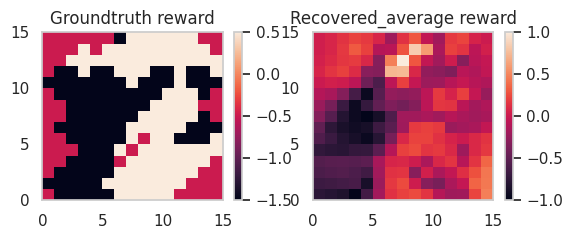

avr: 141.0318817708578
norm_avr: 0
each:
229.97864300471204
300.68451587532377
142.89509892820965
126.7253118424343
161.75882459898065
322.3416477714291
161.75882459898065
322.3416477714291
161.75882459898065
322.3416477714291
225.2584986761909
195.86873380184636
226.25
---------------------
11
avr: 140.37118018230484
norm_avr: 0
each:
235.53846784914995
292.9579217684983
144.25734125753823
124.44980349420585
155.0915131828095
319.92115081685193
155.0915131828095
319.92115081685193
155.0915131828095
319.92115081685193
222.22415263683766
195.31499051597973
226.25
---------------------
12
avr: 140.37834265096413
norm_avr: 0
each:
241.20323527634935
285.45627625300415
147.09802559367824
122.65087326684824
148.45085173753773
315.5193552818428
148.45085173753773
315.5193552818428
148.45085173753773
315.5193552818428
218.83190314480217
194.82704350694354
226.25
---------------------
13
avr: 140.0406759668673
norm_avr: 0
each:
246.95734353410322
278.14579282062493
148.78996921246505
121.37998

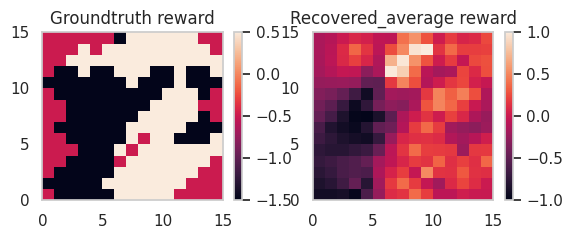

avr: 132.19517472019484
norm_avr: 0
each:
273.4368547251975
240.06125042782725
175.64716514487142
128.26655589025734
101.41343302759608
273.4073335728787
101.41343302759608
273.4073335728787
101.41343302759608
273.4073335728787
194.1874125989578
207.85420778634932
226.25
---------------------
22
avr: 129.91267684095433
norm_avr: 0
each:
275.4475653734959
236.17409504721226
181.1600601369362
129.47550211604712
97.66578234125626
270.70565133162665
97.66578234125626
270.70565133162665
97.66578234125626
270.70565133162665
192.73715236923402
208.66707759207424
226.25
---------------------
23
avr: 128.1897296591324
norm_avr: 0
each:
277.55337182131274
232.43770050716503
177.5679566520942
130.75973062173816
94.46431863849611
268.1498791072961
94.46431863849611
268.1498791072961
94.46431863849611
268.1498791072961
190.61613528396867
205.00282857962964
226.25
---------------------
24
avr: 127.16525388895522
norm_avr: 0
each:
279.7497408592316
228.87579372108854
175.58406060138716
130.8266841696

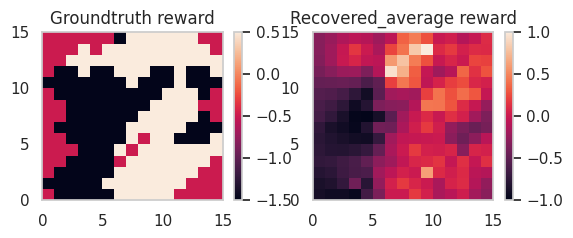

avr: 126.70222329052856
norm_avr: 0
each:
296.4456912474086
210.83384021574096
160.43081358530827
124.02762876987165
100.60214659121793
244.81601229911706
100.60214659121793
244.81601229911706
100.60214659121793
244.81601229911706
182.79924504893344
185.63232690052462
226.25
---------------------
33
avr: 125.87929467987057
norm_avr: 0
each:
297.4700854807605
209.77029717556516
159.59080910048024
122.74755287421748
101.9876679747209
239.3655709152172
101.9876679747209
239.3655709152172
101.9876679747209
239.3655709152172
181.36384613008377
184.6805531380227
226.25
---------------------
34
avr: 126.08980735315025
norm_avr: 0
each:
298.53716209972816
208.7249663094577
158.75293856162736
121.62675435254745
104.52608128313216
237.50033859941038
104.52608128313216
237.50033859941038
104.52608128313216
237.50033859941038
181.37210809709882
183.73895243554253
226.25
---------------------
35
avr: 125.89536724999476
norm_avr: 0
each:
299.64534287924795
207.7142294852817
157.91998159112256
120.47

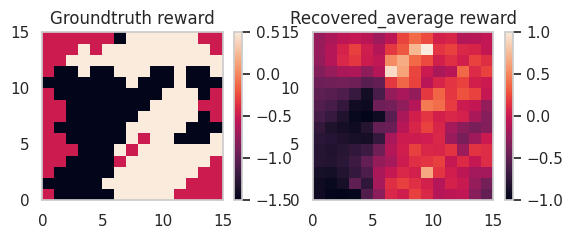

avr: 124.14154432027229
norm_avr: 0
each:
303.84246057169264
206.2884151410581
155.63362799795857
115.44881559342183
113.68300999351165
205.27278938397635
113.68300999351165
205.27278938397635
113.68300999351165
205.27278938397635
173.80807174365953
180.45320869096747
226.25
---------------------
44
avr: 125.25040737199541
norm_avr: 0
each:
304.2326372606077
209.50338435279647
153.23586826597196
114.23852077337942
119.9599026370764
203.14221278742522
119.9599026370764
203.14221278742522
119.9599026370764
203.14221278742522
175.05167569262605
178.1890405266986
226.25
---------------------
45
avr: 123.74231911163044
norm_avr: 0
each:
304.6494940283426
210.99426462383065
154.51510825235377
113.2864057763061
107.092812651431
201.4502301563989
107.092812651431
201.4502301563989
107.092812651431
201.4502301563989
170.90744011043228
177.98266920437635
226.25
---------------------
46
avr: 125.16575687655532
norm_avr: 0
each:
304.3550579197975
212.54200705979562
151.97911947113982
113.697319907

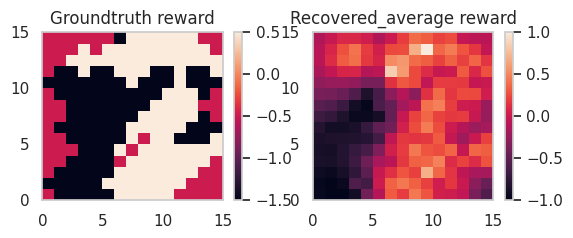

avr: 130.50127925117908
norm_avr: 0
each:
297.0451597331039
234.32543342688837
145.9885652959929
109.45277392684004
106.58424176398337
209.3074335764071
106.58424176398337
209.3074335764071
106.58424176398337
209.3074335764071
173.44869584039967
177.6479994362
226.25
---------------------
55
avr: 132.93599471726498
norm_avr: 0
each:
296.5271726275843
239.9059859759008
146.57936737327972
109.97809883850424
109.97015750558135
215.27280323761752
109.97015750558135
215.27280323761752
109.97015750558135
215.27280323761752
176.87195070448658
180.92608530544862
226.25
---------------------
56
avr: 131.9701229212151
norm_avr: 0
each:
295.8786158055963
245.43413742956312
145.28815946287872
109.01488447178099
108.39410319463401
222.17485936869468
108.39410319463401
222.17485936869468
108.39410319463401
222.17485936869468
178.7322684859805
183.73150941578672
226.25
---------------------
57
avr: 137.56335024192413
norm_avr: 0
each:
293.61067569525324
251.864982225969
145.01892361145525
109.2179853

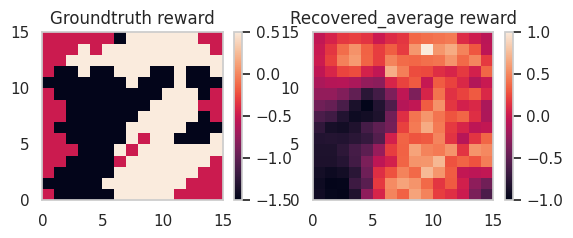

avr: 141.22197031795446
norm_avr: 0
each:
270.3648221077643
263.4343652788714
140.38646551494074
110.01250886891748
126.65696003362127
261.92670409416985
126.65696003362127
261.92670409416985
126.65696003362127
261.92670409416985
194.99491541538674
201.15658480455528
226.25
---------------------
66
avr: 129.44893152161652
norm_avr: 0
each:
267.41441761708495
254.67920454670474
136.8487096252626
107.87588143660307
99.42805480777544
249.53008555430924
99.42805480777544
249.53008555430924
99.42805480777544
249.53008555430924
181.36926343119094
193.18939758978593
226.25
---------------------
67
avr: 130.63423966770185
norm_avr: 0
each:
263.02826066595776
247.40104617711722
140.21133373159017
110.25318014537255
110.6317147053309
237.04531810134316
110.6317147053309
237.04531810134316
110.6317147053309
237.04531810134316
180.39249191400597
188.62832591646668
226.25
---------------------
68
avr: 135.4415565215377
norm_avr: 0
each:
260.1148567032464
241.9993935487022
136.1200728287272
110.6980

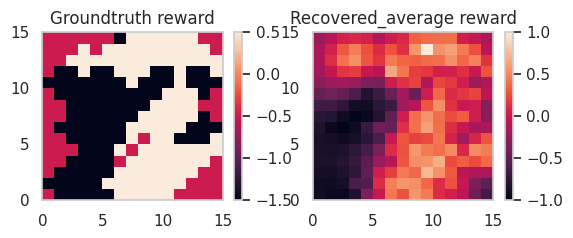

avr: 125.57338875304251
norm_avr: 0
each:
232.52770059098785
224.13288540882982
133.30832755416523
112.1867854669917
122.8597651612978
219.80722150388854
122.8597651612978
219.80722150388854
122.8597651612978
219.80722150388854
173.01566590165336
176.5577745290269
226.25
---------------------
77
avr: 119.55235884753637
norm_avr: 0
each:
230.11783559940332
215.02977047240825
136.03021568939596
109.57227267964707
144.3117742546339
200.34248565722757
144.3117742546339
200.34248565722757
144.3117742546339
200.34248565722757
172.4712874176439
172.32712995593073
226.25
---------------------
78
avr: 122.20140885098684
norm_avr: 0
each:
227.78231664368352
220.8921207499263
132.69277155519458
111.93199064405083
105.82582972048978
205.62845109157618
105.82582972048978
205.62845109157618
105.82582972048978
205.62845109157618
162.7662042029053
169.16061132338538
226.25
---------------------
79
avr: 120.14351594421119
norm_avr: 0
each:
224.8835828671987
211.93505657168075
136.80013270160958
109.346

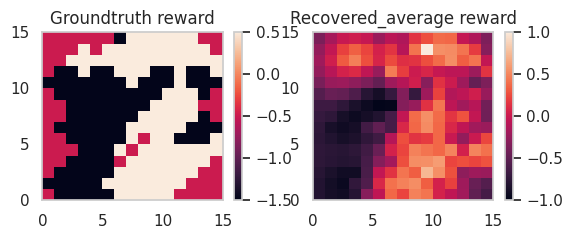

avr: 111.74830471218125
norm_avr: 0
each:
208.12182891880934
200.80388867523928
134.72137637932983
107.97341012860473
199.17630803852083
167.252381248755
199.17630803852083
167.252381248755
199.17630803852083
167.252381248755
175.09065719638107
183.2143446436379
226.25
---------------------
88
avr: 109.25673821679896
norm_avr: 0
each:
204.84115083305988
195.38409481688916
131.29131805255406
110.63972747620308
128.06191791841115
178.70322567941037
128.06191791841115
178.70322567941037
128.06191791841115
178.70322567941037
156.24517219721707
154.9972718659822
226.25
---------------------
89
avr: 109.75185067604262
norm_avr: 0
each:
204.05726599919413
198.98323685175396
134.00502507928178
107.4869824021299
180.63502446371103
162.40574667546295
180.63502446371103
162.40574667546295
180.63502446371103
162.40574667546295
167.36548237498818
171.520385569587
226.25
---------------------
90
avr: 109.6435571205995
norm_avr: 0
each:
203.31148858440562
190.83238389475719
130.12210078144315
110.252

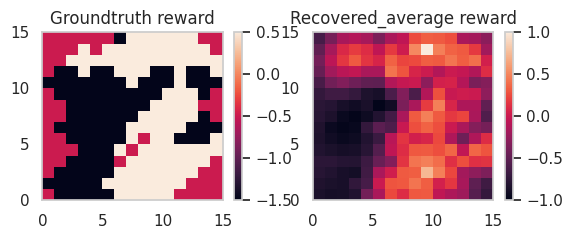

avr: 103.5559753279439
norm_avr: 0
each:
190.24655091011215
176.6944105243098
132.73007182429436
109.02265568325673
140.2068239824778
142.80946715033457
140.2068239824778
142.80946715033457
140.2068239824778
142.80946715033457
145.77425623404102
141.5081455664062
226.25
---------------------
99
avr: 124.11770857119278
norm_avr: 0
each:
189.2020323754872
180.8416747488144
129.95363477779006
109.28157159896575
222.08786069420825
153.07147899728443
222.08786069420825
153.07147899728443
222.08786069420825
153.07147899728443
173.47569325755353
166.9565768730494
226.25
---------------------
100
avr: 103.71779339854267
norm_avr: 0
each:
187.79078339993129
175.22186039541603
131.84603482507177
107.2919250419671
129.09653806230295
137.61551938314392
129.09653806230295
137.61551938314392
129.09653806230295
137.61551938314392
140.22867759987267
134.73077710410786
226.25
---------------------
101
avr: 116.90800558561598
norm_avr: 0
each:
186.97413547446473
181.5849271010419
129.87809279869762
108.

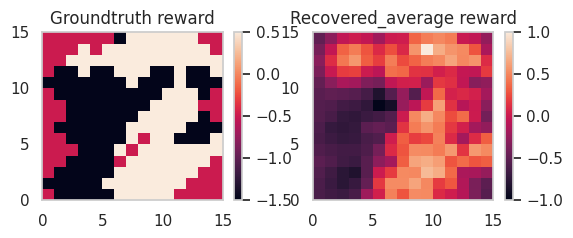

avr: 124.52520946349061
norm_avr: 0
each:
177.01822099013893
177.58855524992714
129.42641683884352
109.22854983557423
217.47420158050343
150.88298380711694
217.47420158050343
150.88298380711694
217.47420158050343
150.88298380711694
169.83332990773448
163.95060239862795
226.25
---------------------
110
avr: 102.69680871775276
norm_avr: 0
each:
176.1819009090407
158.85018552501307
132.0517671608409
105.68175824081882
130.49949860355838
143.43040236457114
130.49949860355838
143.43040236457114
130.49949860355838
143.43040236457114
139.4555314740102
137.741084762706
226.25
---------------------
111
avr: 117.84098235979664
norm_avr: 0
each:
172.64773581863813
148.12403773225412
129.0274114302361
109.29146538436153
183.85822478874326
156.28682580880835
183.85822478874326
156.28682580880835
183.85822478874326
156.28682580880835
157.95258021581446
156.28682580880835
226.25
---------------------
112
avr: 125.88711064478869
norm_avr: 0
each:
172.01780306533377
171.89057930805072
131.6179022417810

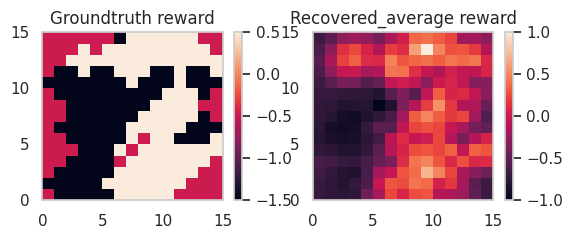

avr: 105.337396457527
norm_avr: 0
each:
160.91850461996728
190.98429326650944
127.29461679239935
103.42178060132952
134.87339998136886
144.13081349077618
134.87339998136886
144.13081349077618
134.87339998136886
144.13081349077618
141.96318356966407
139.5021067360725
226.25
---------------------
121
avr: 124.39534667734475
norm_avr: 0
each:
161.7123142269092
168.67356225228454
126.98846733789843
106.70666828209751
192.15948688968595
165.50106014336538
192.15948688968595
165.50106014336538
192.15948688968595
165.50106014336538
163.70626531983436
165.50106014336538
226.25
---------------------
122
avr: 130.11958529322254
norm_avr: 0
each:
156.98273978278178
194.62440519434924
128.4593954172279
103.58856596898771
249.11533492214733
143.22256792873802
249.11533492214733
143.22256792873802
249.11533492214733
143.22256792873802
176.06688149160027
150.1026538557599
226.25
---------------------
123
avr: 113.45994106901094
norm_avr: 0
each:
159.29109549165202
172.174290842591
127.59404268597972


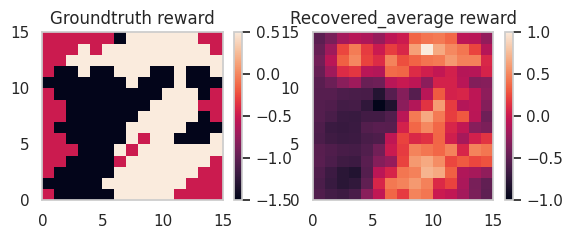

avr: 116.34311658923389
norm_avr: 0
each:
148.16267868421585
174.9212541230001
127.42049945005733
102.35885178659407
192.10282030202188
135.08903589736366
192.10282030202188
135.08903589736366
192.10282030202188
135.08903589736366
153.4438852642024
141.62585729078975
226.25
---------------------
132
avr: 136.13638776703738
norm_avr: 0
each:
144.88049357235988
204.8014862768253
127.8390112830273
105.56018194200881
229.76084700367218
174.2864009964997
229.76084700367218
174.2864009964997
229.76084700367218
174.2864009964997
179.5222917074737
174.2864009964997
226.25
---------------------
133
avr: 108.43456480656509
norm_avr: 0
each:
144.99988894738738
181.90987306709874
125.47920919251288
102.73796859600961
140.15516881724324
138.78688232656467
140.15516881724324
138.78688232656467
140.15516881724324
138.78688232656467
139.19530932344324
139.47102557190397
226.25
---------------------
134
avr: 133.48882711623034
norm_avr: 0
each:
142.10843961544893
212.2550686527044
127.59436655206838
10

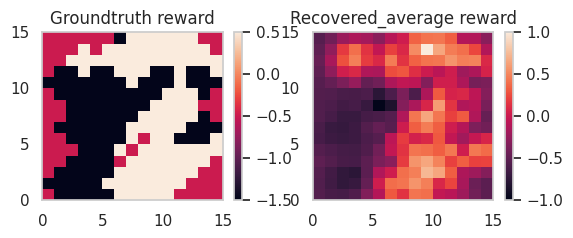

avr: 113.1911020172937
norm_avr: 0
each:
131.1030399428206
231.02182323377642
127.61914630364768
101.15428156105646
151.42958052963618
176.11517966641927
151.42958052963618
176.11517966641927
151.42958052963618
176.11517966641927
157.35325716294676
151.42958052963618
226.25
---------------------
143
avr: 122.04875870703415
norm_avr: 0
each:
131.92523061774654
189.67095985211697
125.03080997841518
101.1393814052826
221.24967140315732
136.51307938042825
221.24967140315732
136.51307938042825
221.24967140315732
136.51307938042825
162.1054634204318
136.51307938042825
226.25
---------------------
144
avr: 115.06162809321113
norm_avr: 0
each:
129.3242284853861
239.56400312133255
125.44384594945933
102.79930858383968
138.48323961822229
179.88977437500634
138.48323961822229
179.88977437500634
138.48323961822229
179.88977437500634
155.22504281197035
138.48323961822229
226.25
---------------------
145
avr: 118.00467272623924
norm_avr: 0
each:
128.67756210424773
197.82814296176144
123.857167603612

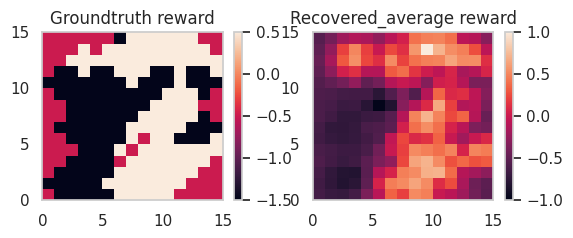

avr: 110.84238949133166
norm_avr: 0
each:
118.47975015912009
227.26393586127693
124.44484170952269
99.61035857613257
175.86621768098342
127.61861162661616
175.86621768098342
127.61861162661616
175.86621768098342
127.61861162661616
148.02533742288512
127.61861162661616
226.25
---------------------
154
avr: 113.7256095051385
norm_avr: 0
each:
115.12797356346555
184.6729737361378
126.93181387588008
102.12317081547866
146.67394696858318
192.8568319904952
146.67394696858318
192.8568319904952
146.67394696858318
192.8568319904952
154.74482688681974
146.67394696858318
226.25
---------------------
155
avr: 115.39363523649752
norm_avr: 0
each:
115.68181372202925
234.3846863609921
124.25550010633474
99.84231207188958
199.6822657520327
124.86123144917242
199.6822657520327
124.86123144917242
199.6822657520327
124.86123144917242
154.7794803864861
124.86123144917242
226.25
---------------------
156
avr: 116.2111515419239
norm_avr: 0
each:
113.11591478176344
191.8624072464328
126.72734638949106
102.34

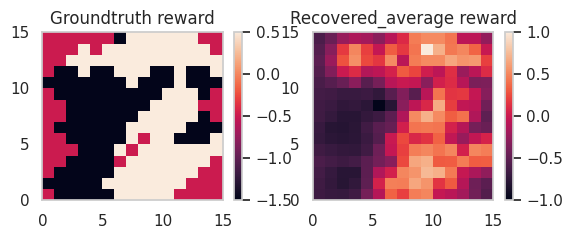

avr: 109.40299062305789
norm_avr: 0
each:
102.60279892297223
211.21267392911142
128.54768995853144
98.42342556477115
122.98077136590331
237.45967876046802
122.98077136590331
237.45967876046802
122.98077136590331
237.45967876046802
162.21079387545
125.76423066221737
226.25
---------------------
165
avr: 105.64709357875529
norm_avr: 0
each:
102.75643875740225
259.5868932463019
125.61810028274317
100.26311324830021
169.5545785621708
122.14929304968476
169.5545785621708
122.14929304968476
169.5545785621708
122.14929304968476
146.33361603703142
123.88369666621396
226.25
---------------------
166
avr: 107.35743643461652
norm_avr: 0
each:
99.88731570569713
217.31289694126548
129.43885512771038
98.58083442809755
114.99310914810545
250.66607155780477
114.99310914810545
250.66607155780477
114.99310914810545
250.66607155780477
164.2197444320501
122.21598213790791
226.25
---------------------
167
avr: 102.13327469676996
norm_avr: 0
each:
99.97071936278549
213.3725581586521
126.87375613845462
100.7

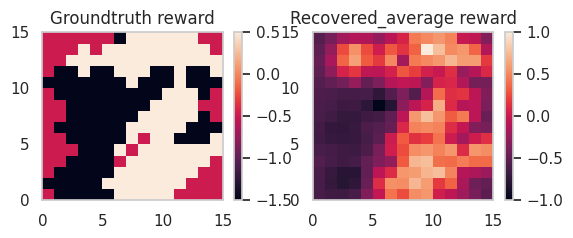

avr: 114.50671059529215
norm_avr: 0
each:
94.25639515309999
234.01823640774867
126.52908661295935
100.50849505561101
158.7588702872416
216.62728377731682
158.7588702872416
216.62728377731682
158.7588702872416
216.62728377731682
168.14706754230943
158.7588702872416
226.25
---------------------
176
avr: 91.10016341751343
norm_avr: 0
each:
95.65128576125348
200.6242526194482
127.92276582705172
98.83292223165489
110.4807752291335
113.26197337890794
110.4807752291335
113.26197337890794
110.4807752291335
113.26197337890794
119.42594722635326
111.87137430402072
226.25
---------------------
177
avr: 113.08032586731105
norm_avr: 0
each:
93.42100670638338
238.9018778554914
125.58488321031724
98.30259417970795
144.50199132122594
236.62810173748827
144.50199132122594
236.62810173748827
144.50199132122594
236.62810173748827
169.96006411280425
144.50199132122594
226.25
---------------------
178
avr: 93.22565936125775
norm_avr: 0
each:
94.45532424330572
198.72675394182116
127.69896426471938
97.563276

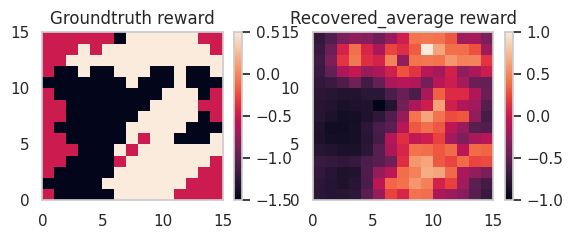

avr: 96.18156917382474
norm_avr: 0
each:
107.31196393952985
205.73314783388716
128.25050235451627
97.3720097687465
105.92984588787807
189.40884462141997
105.92984588787807
189.40884462141997
105.92984588787807
189.40884462141997
142.4683695424574
117.78123314702306
226.25
---------------------
187
avr: 93.74780830326657
norm_avr: 0
each:
102.7480975519393
256.7330565619172
125.85198218190263
96.10884622276953
136.23658445011856
107.22647292406717
136.23658445011856
107.22647292406717
136.23658445011856
107.22647292406717
131.18311546410857
116.5392275529849
226.25
---------------------
188
avr: 100.65435901069328
norm_avr: 0
each:
109.1869039905795
210.49396305411045
129.00650305302634
97.23218165151395
112.68463382571153
203.35836287692453
112.68463382571153
203.35836287692453
112.68463382571153
203.35836287692453
149.40485418571384
120.84556843936893
226.25
---------------------
189
avr: 97.4321170610605
norm_avr: 0
each:
105.07013219998927
263.87127571288045
126.66783277548824
96.73

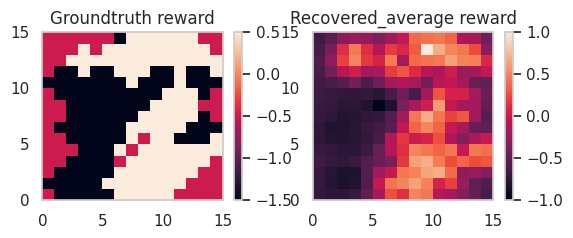

avr: 99.63501547206575
norm_avr: 0
each:
111.66112592752994
245.74572502963755
126.0035838651614
94.20248832655452
137.27976027622222
119.8315521561499
137.27976027622222
119.8315521561499
137.27976027622222
119.8315521561499
134.89468604459998
122.91756801065566
226.25
---------------------
198
avr: 97.63711520962099
norm_avr: 0
each:
117.92674658705032
202.74994114347197
129.4612243840641
94.08976362910185
104.70831350036579
172.50693748581477
104.70831350036579
172.50693748581477
104.70831350036579
172.50693748581477
137.58734287022298
123.69398548555722
226.25
---------------------
199
avr: 93.79575633456398
norm_avr: 0
each:
113.98424077852303
255.30089068390282
127.11585271846432
94.03054439471202
133.37676169723602
102.95629195822866
133.37676169723602
102.95629195822866
133.37676169723602
102.95629195822866
129.94306895419962
120.55004674849368
226.25
---------------------
200
avr: 97.47059425940095
norm_avr: 0
each:
120.17753261222065
207.61239539864505
128.8192702508373
93.84

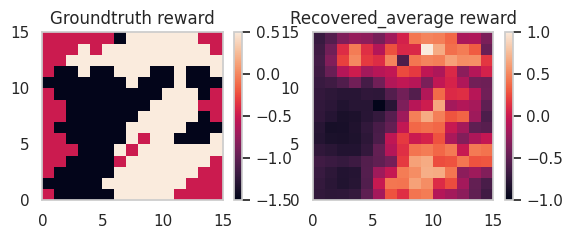

avr: 101.39975069232969
norm_avr: 0
each:
121.40637416041585
211.23571443752414
128.16558155205757
94.9622880373058
106.22040187453315
245.63984878798445
106.22040187453315
245.63984878798445
106.22040187453315
245.63984878798445
161.13507101748561
124.78597785623671
226.25
---------------------
209
avr: 96.57892669549561
norm_avr: 0
each:
115.10757104634487
267.03370216891835
126.25045546212513
94.57748143971976
135.41040968431196
109.40126582312311
135.41040968431196
109.40126582312311
135.41040968431196
109.40126582312311
133.74042366394133
120.679013254235
226.25
---------------------
210
avr: 104.1358466046533
norm_avr: 0
each:
121.65240727286553
215.7893087111488
128.0449447827695
96.76723203089914
111.11724020795742
265.1717011906468
111.11724020795742
265.1717011906468
111.11724020795742
265.1717011906468
169.11207169934957
124.84867602781752
226.25
---------------------
211
avr: 100.66492439333558
norm_avr: 0
each:
115.29411147292988
206.44184323174719
126.14542996626936
93.70

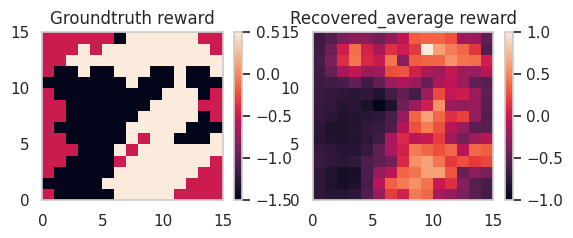

avr: 95.78359016329678
norm_avr: 0
each:
117.31274544739493
222.21063579381976
125.7366862026507
120.73265758186047
133.2180592972798
99.73991596133388
133.2180592972798
99.73991596133388
133.2180592972798
99.73991596133388
128.48666508015668
123.23467189225559
226.25
---------------------
220
avr: 97.2730680259894
norm_avr: 0
each:
123.53214217742072
187.4856378670665
127.45978948375439
99.22316242151547
104.23615243768737
200.45710529251528
104.23615243768737
200.45710529251528
104.23615243768737
200.45710529251528
145.1780505140365
125.49596583058755
226.25
---------------------
221
avr: 95.10022804683844
norm_avr: 0
each:
117.33383677984848
228.60006133636662
125.63719098607092
124.03390247552646
130.00152627094852
100.6844109349473
130.00152627094852
100.6844109349473
130.00152627094852
100.6844109349473
128.76628031955
124.83554673079868
226.25
---------------------
222
avr: 102.01577573389271
norm_avr: 0
each:
123.84783274676089
176.15412322524475
127.34616156994626
116.11606495

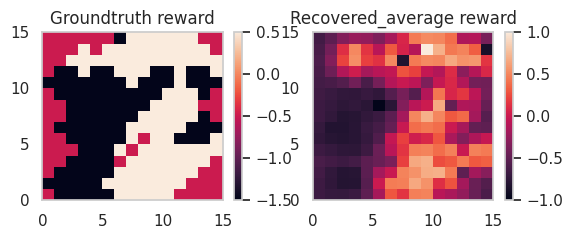

avr: 106.2697736754059
norm_avr: 0
each:
123.44294761747254
185.04894303958537
126.75235466207477
146.48353237697683
110.82653727188821
289.38172600721543
110.82653727188821
289.38172600721543
110.82653727188821
289.38172600721543
178.23525675334204
136.6179435195258
226.25
---------------------
231
avr: 99.40465579014133
norm_avr: 0
each:
116.7790539936905
240.28248240003026
125.01596160850117
118.31437186003811
139.8965094995743
108.22428213824085
139.8965094995743
108.22428213824085
139.8965094995743
108.22428213824085
134.47542447757056
121.66516673426963
226.25
---------------------
232
avr: 106.77823319919291
norm_avr: 0
each:
123.27965970800736
189.70875202529032
126.64441892853789
150.0538780736609
107.11138005214718
298.27279290329386
107.11138005214718
298.27279290329386
107.11138005214718
298.27279290329386
180.58392276018196
138.3491485010994
226.25
---------------------
233
avr: 98.77516757864915
norm_avr: 0
each:
116.99417331045741
246.3857244660356
124.92283592654185
122

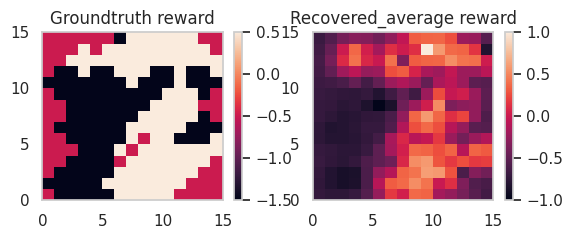

avr: 96.906267054865
norm_avr: 0
each:
116.14671375826563
246.42302205908246
124.56211273069619
156.8793209066467
137.56980741544518
100.78233177578342
137.56980741544518
100.78233177578342
137.56980741544518
100.78233177578342
135.9067587028377
131.0659600730707
226.25
---------------------
242
avr: 109.4826364974164
norm_avr: 0
each:
122.89018445939413
192.9842113814498
126.12397813999831
124.79431088807468
107.99194646377445
300.2123601257689
107.99194646377445
300.2123601257689
107.99194646377445
300.2123601257689
179.1405604637547
125.4591445140365
226.25
---------------------
243
avr: 97.1146294549323
norm_avr: 0
each:
116.15597974762292
251.24123491197966
124.47574482058704
159.22422188663307
136.42541045344197
121.63723454233418
136.42541045344197
121.63723454233418
136.42541045344197
121.63723454233418
142.52851163541513
130.4505776370145
226.25
---------------------
244
avr: 119.33833770517117
norm_avr: 0
each:
122.7405014550806
195.86251178523148
126.02400622666326
127.01023

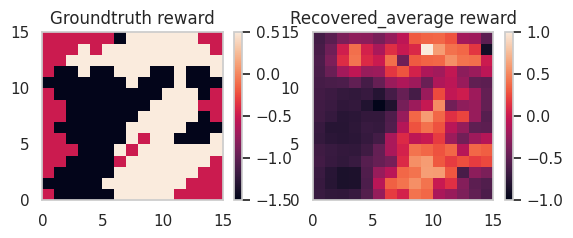

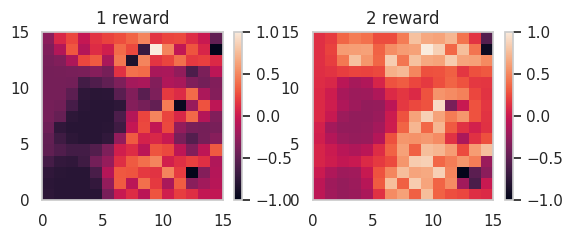

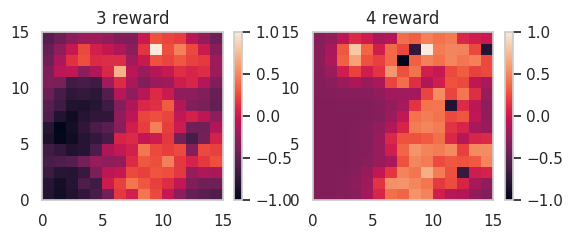

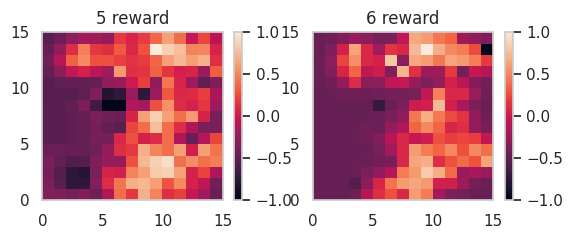

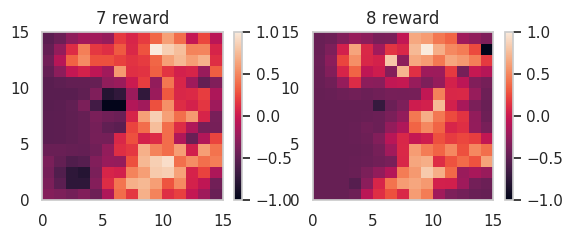

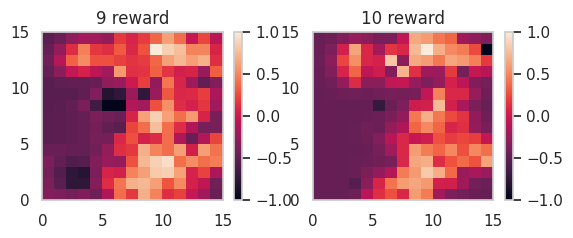

avr: 99.29596099839128
norm_avr: 0
each:
115.49837723636251
220.20257051017376
124.22229141007219
170.18131876320376
131.48799047209397
136.2446136177469
131.48799047209397
136.2446136177469
131.48799047209397
136.2446136177469
143.33023701893347
133.86630204492042
226.25
---------------------


In [25]:
if __name__ == '__main__': 
    main10n(grid_size= 15, 
         discount= 0.90, 
         n_objects= 25, 
         n_colours= 2, 
         n_trajectories= 40, 
         epochs= 250, 
         learning_rate= 0.01, 
         structure= (3, 3))
# (grid_size, discount, n_objects, n_colours, n_trajectories
# , epochs,learning_rate, structure)

In [ ]:
#situation that showed averaging perform better than only increase epochs
#1. less object: less object makes more 0, which dont need to be updated
#2. less trajectories: no much information to gain

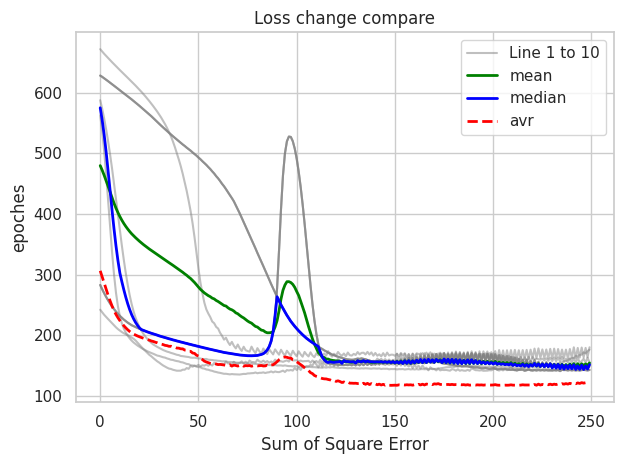

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# Creating x-axis values (assuming equal intervals)
x_values = range(len(avr_arr))

# Setting the style for seaborn (optional)
sns.set(style="whitegrid")

# Plotting the lines using seaborn
sns.lineplot(x=x_values, y=arr1, alpha=0.5, color='grey')  # Adjust alpha value to change transparency
sns.lineplot(x=x_values, y=arr2, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr3, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr4, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr5, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr6, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr7, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr8, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr9, alpha=0.5, color='grey')
sns.lineplot(x=x_values, y=arr10, label='Line 1 to 10', alpha=0.5, color='grey')

# Customizing the appearance of 'avr_arr' line to highlight it
sns.lineplot(x=x_values, y=arr_mean, label='mean', color='green', linewidth=2)
sns.lineplot(x=x_values, y=arr_median, label='median',color='blue', linewidth=2)
sns.lineplot(x=x_values, y=avr_arr, label='avr', color='red', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as desired
# sns.lineplot(x=x_values, y=arr_norm_avr, label='normed_avr',color='orange', linewidth=1)
# Adding labels and title
plt.xlabel('Sum of Square Error')
plt.ylabel('epoches')
plt.title('Loss change compare')

# Displaying the plot
plt.legend()
plt.tight_layout()

folder = 0
num = 0
while True:
    folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
    if not folder_exist:
        break
    num += 1
plt.savefig(f'fig/Compare_10_norm{num}.png',dpi=300)

plt.show()

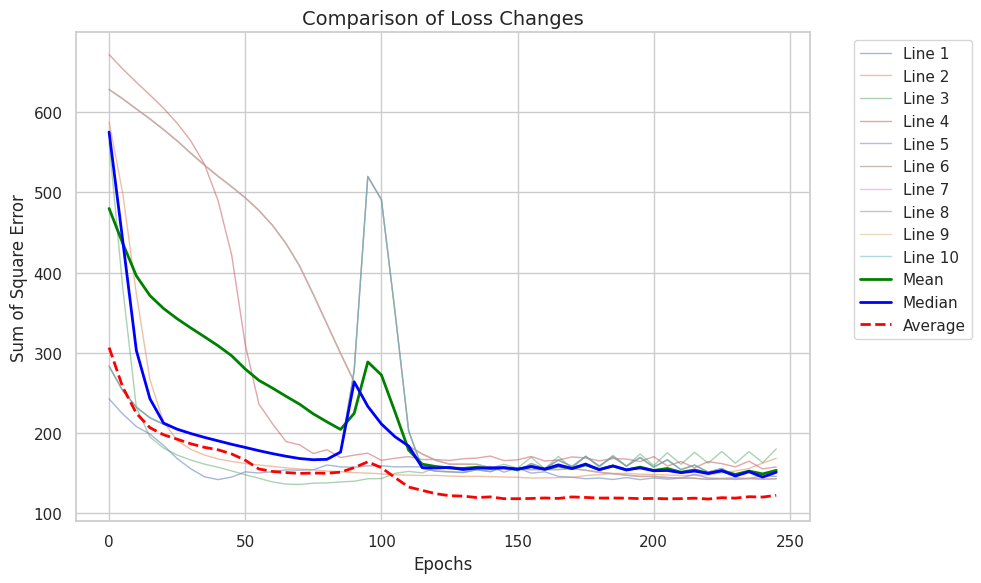

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# Define the interval for sampling the x-axis
interval = 5

# Creating x-axis values with larger intervals between data points
x_values = range(0, len(avr_arr), interval)

# Setting the style for seaborn (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plotting the lines using seaborn with more vibrant colors and improved readability
for i in range(1, 11):
    sns.lineplot(x=x_values, y=locals()[f"arr{i}"][::interval], alpha=0.5, label=f'Line {i}', linewidth=1)

# Customizing the appearance of 'avr_arr' line to highlight it
sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean', color='green', linewidth=2)
sns.lineplot(x=x_values, y=arr_median[::interval], label='Median', color='blue', linewidth=2)
sns.lineplot(x=x_values, y=avr_arr[::interval], label='Average', color='red', linestyle='--', linewidth=2)

# Adding labels and title with a slightly larger font size for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Sum of Square Error', fontsize=12)
plt.title('Comparison of Loss Changes', fontsize=14)

# Improving legend placement and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Saving the plot with a more systematic naming convention
folder = 0
num = 0
while True:
    folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
    if not folder_exist:
        break
    num += 1
plt.savefig(f'fig/Compare_10_norm{num}.png', dpi=300)

# Displaying the plot
plt.show()


In [29]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# # Define the interval for sampling the x-axis
# interval = 5

# # Creating x-axis values with larger intervals between data points
# x_values = range(0, len(avr_arr), interval)

# # Setting the style for seaborn (optional)
# sns.set(style="whitegrid")

# plt.figure(figsize=(10, 6))

# # Plotting the lines using seaborn with more vibrant colors and improved readability
# for i in range(1, 11):
#     sns.lineplot(x=x_values, y=locals()[f"arr{i}"][::interval], alpha=0.5, label=f'Line {i}', linewidth=1)

# # Customizing the appearance of 'avr_arr' line to highlight it
# sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean', color='green', linewidth=2)
# sns.lineplot(x=x_values, y=arr_median[::interval], label='Median', color='blue', linewidth=2)
# sns.lineplot(x=x_values, y=avr_arr[::interval], label='Average', color='red', linestyle='--', linewidth=2)

# # Adding a horizontal line at y=141 to represent the ground truth baseline
# plt.axhline(y=141, color='black', linestyle=':', label="0 Matrix's loss", linewidth=2)

# # Adding labels and title with a slightly larger font size for better readability
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Sum of Square Error', fontsize=12)
# plt.title('Comparison of Loss Changes', fontsize=14)

# # Improving legend placement and appearance
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Saving the plot with a more systematic naming convention
# folder = 0
# num = 0
# while True:
#     folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
#     if not folder_exist:
#         break
#     num += 1
# plt.savefig(f'fig/Compare_10_norm{num}.png', dpi=300)

# # Displaying the plot
# plt.show()

# percentage_improvement = ((arr_mean[249] - avr_arr[249]) / arr_mean[249]) * 100
# print(percentage_improvement)

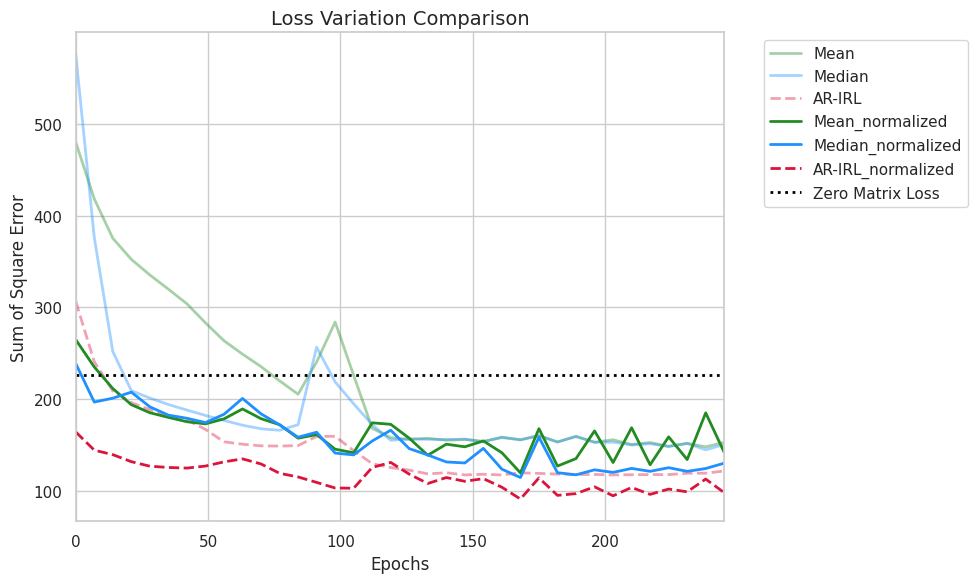

20.437763961569306
19.022500729217043
30.722251589331705
25.824528293108933
decline
19.221518176383196


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# Define the interval for sampling the x-axis
interval = 7

# Creating x-axis values with larger intervals between data points
x_values = range(0, len(avr_arr), interval)

# Setting the style for seaborn (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plotting the lines using seaborn with more vibrant colors and improved readability
# for i in range(1, 11):
#     sns.lineplot(x=x_values, y=locals()[f"arr{i}n"][::interval], alpha=0.4, label=f'Line {i}', linewidth=1)

# Customizing the appearance of 'avr_arr' line to highlight it
sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean', color='forestgreen', linewidth=2,alpha=0.4)
sns.lineplot(x=x_values, y=arr_median[::interval], label='Median', color='dodgerblue', linewidth=2,alpha=0.4)
sns.lineplot(x=x_values, y=avr_arr[::interval], label='AR-IRL', color='crimson', linestyle='--', linewidth=2,alpha=0.4)

sns.lineplot(x=x_values, y=arr_meann[::interval], label='Mean_normalized', color='forestgreen', linewidth=2)
sns.lineplot(x=x_values, y=arr_mediann[::interval], label='Median_normalized', color='dodgerblue', linewidth=2)
sns.lineplot(x=x_values, y=avr_arrn[::interval], label='AR-IRL_normalized', color='crimson', linestyle='--', linewidth=2)

# Adding a horizontal line at y=141 to represent the ground truth baseline
plt.axhline(y=226.25, color='black', linestyle=':', label="Zero Matrix Loss", linewidth=2)

# Setting x-axis limits from 0 to the maximum value of x_values
plt.xlim(0, max(x_values))

# Adding labels and title with a slightly larger font size for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Sum of Square Error', fontsize=12)
plt.title('Loss Variation Comparison', fontsize=14)

# Improving legend placement and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Saving the plot with a more systematic naming convention
folder = 0
num = 0
while True:
    folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
    if not folder_exist:
        break
    num += 1
plt.savefig(f'fig/Compare_un_normalize{num}.png', dpi=300)

# Displaying the plot
plt.show()

percentage_improvement = ((arr_mean[249] - avr_arr[249]) / arr_mean[249]) * 100
print(percentage_improvement)

percentage_improvement = ((arr_median[249] - avr_arr[249]) / arr_median[249]) * 100
print(percentage_improvement)

percentage_improvement = ((arr_meann[249] - avr_arrn[249]) / arr_meann[249]) * 100
print(percentage_improvement)

percentage_improvement = ((arr_mediann[249] - avr_arrn[249]) / arr_mediann[249]) * 100
print(percentage_improvement)

print('decline')
percentage_improvement = ((avr_arr[249] - avr_arrn[249]) / avr_arr[249]) * 100
print(percentage_improvement)


In [44]:
print('decline')
percentage_improvement = ((avr_arr[249] - avr_arrn[249]) / avr_arr[249]) * 100
print(percentage_improvement)

print('decline')
percentage_improvement = ((arr_mean[249] - arr_meann[249]) / arr_mean[249]) * 100
print(percentage_improvement)

print('decline')
percentage_improvement = ((arr_median[249] - arr_mediann[249]) / arr_median[249]) * 100
print(percentage_improvement)

decline
19.221518176383196
decline
7.2297124961557895
decline
11.813982406273144


In [10]:
mean:26.570144656267175, 22.39612092381415, 32.4627307708223, 16.770773776578682, 18.168403533389956, 15.951170489004532, 31.22368092773443, 30.020025100283966,21.416696359218292
median:19.192288803045614, 21.136682924520617, -2.552779648560273, 9.957056965556731, 23.89960891422803, 15.689657781468464, 30.639300383244095, 19.660431528571856,17.850534568244353

SyntaxError: invalid syntax (1235538139.py, line 1)

In [ ]:
policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
tra = ow.generate_trajectories(40,8,lambda s: policy[s])
tra

In [ ]:
(26.570144656267175+ 22.39612092381415+ 32.4627307708223+16.770773776578682+ 18.168403533389956)/5

In [ ]:
(19.192288803045614+ 21.136682924520617+ -2.552779648560273+ 9.957056965556731+ 23.89960891422803)/5

In [ ]:
(26.570144656267175, 22.39612092381415, 32.4627307708223, 16.770773776578682, 18.168403533389956, 15.951170489004532, 31.22368092773443, 30.020025100283966,21.416696359218292)/9